## Importing Libraries

### Data Preprocessing Libraries

In [1]:
import numpy as np
import pandas as pd

### Data Visualization Libraries

In [2]:
import matplotlib.pyplot as plt

### Text Processing Libraries

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

### Machine Learning Libraries

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

### Performance Evaluation Libraries

In [5]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Loading Training and Validation Data

In [6]:
train_data = pd.read_csv('Twitter Sentiment/twitter_training.csv', header=None)
validation_data = pd.read_csv('Twitter Sentiment/twitter_validation.csv', header=None)

In [7]:
train_data

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
validation_data

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


## Data Preprocessing

### Rename Columns

In [9]:
column_dict = {
    0: "ID",
    1: "Subject",
    2: "Sentiment",
    3: "Tweet"
}

train_data.rename(columns=column_dict, inplace=True)
validation_data.rename(columns=column_dict, inplace=True)

In [10]:
train_data

,ID,Subject,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
validation_data

,ID,Subject,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### Managing Data Type

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Subject    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
train_data['Tweet'] = train_data['Tweet'].astype(str)
validation_data['Tweet'] = validation_data['Tweet'].astype(str)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Subject    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      74682 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Checking Null Values

In [15]:
train_data.isnull().sum() * 100 / len(train_data)

ID           0.0
Subject      0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [16]:
validation_data.isnull().sum() * 100 / len(validation_data)

ID           0.0
Subject      0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Subject    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      74682 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [18]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Subject    1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Tweet      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

### Distinct Subjects

In [19]:
train_data['Subject'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [20]:
validation_data['Subject'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


### Distinct Sentiments

In [21]:
train_data['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [22]:
validation_data['Sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

## Visualization

### Sentiment Spread

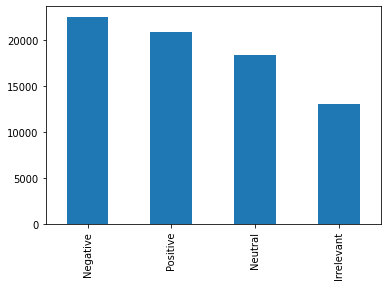

In [23]:
train_data['Sentiment'].value_counts().plot.bar()

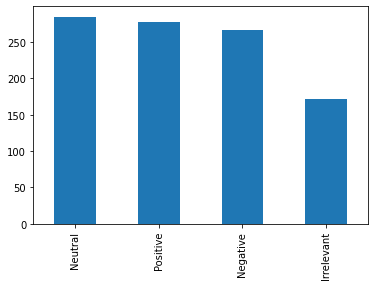

In [24]:
validation_data['Sentiment'].value_counts().plot.bar()

### Sentiment plot for various subjects

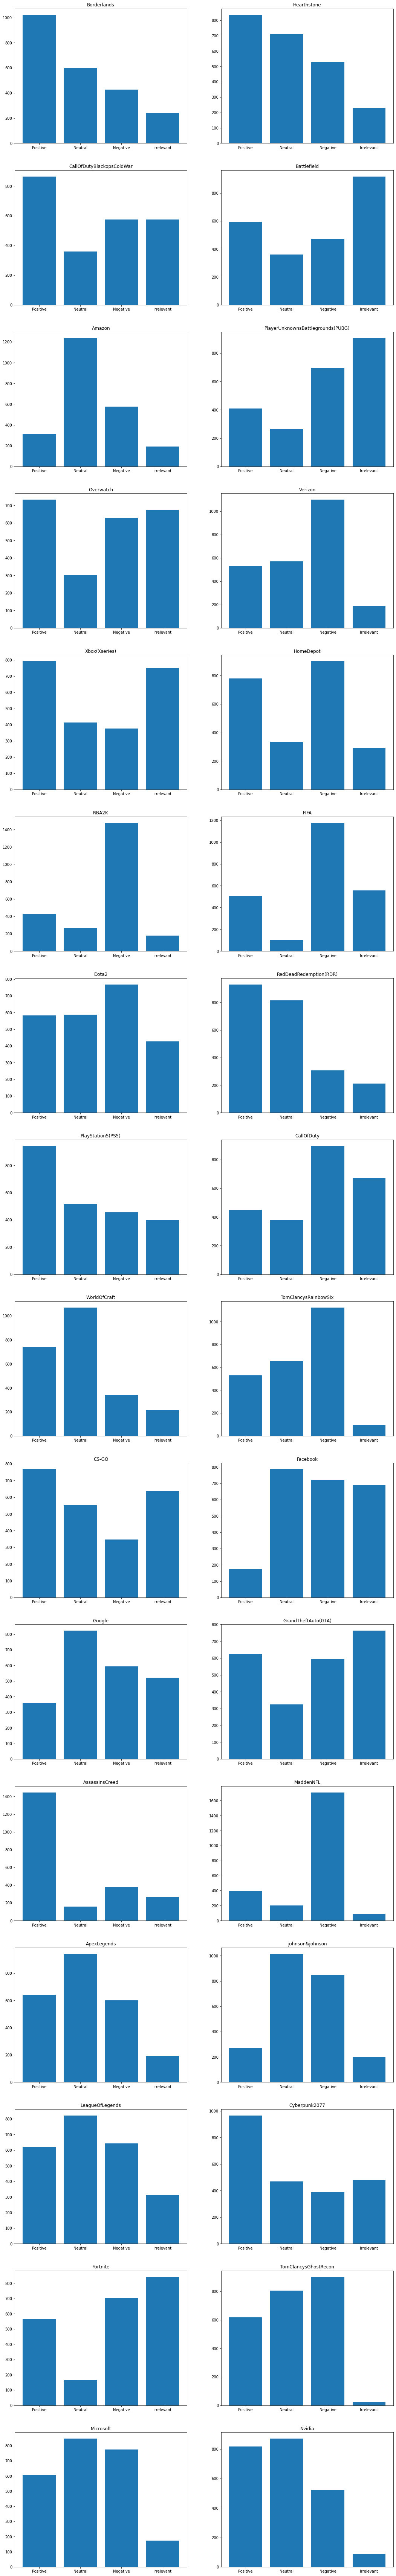

In [25]:
num_plots = len(train_data['Subject'].value_counts())

fig, axes = plt.subplots(num_plots // 2, 2, figsize=(18, 125))

subjects = train_data['Subject'].unique()
sentiments = train_data['Sentiment'].unique()

for i in range(num_plots):
  subject = subjects[i]
  y = list()
  for sentiment in sentiments:
    curr = len(train_data[(train_data['Sentiment'] == sentiment) & (train_data['Subject'] == subject)])
    y.append(curr)
  
  axes[i % 16][i // 16].bar(sentiments, y)
  axes[i % 16][i // 16].set_title(subject)

## Cleaning Tweets

### Removing hashtags and mentions

In [26]:
import re

train_data['Cleaned Tweet'] = train_data['Tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+', ' ', x))
train_data['Cleaned Tweet'] = train_data['Cleaned Tweet'].apply(lambda x: re.sub('#[A-Za-z0-9]+', ' ', x))

validation_data['Cleaned Tweet'] = validation_data['Tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+', ' ', x))
validation_data['Cleaned Tweet'] = validation_data['Cleaned Tweet'].apply(lambda x: re.sub('#[A-Za-z0-9]+', ' ', x))

### Remove Contractions

In [27]:
!pip install contractions
import contractions
def expand_contractions(text):
  return ''.join(contractions.fix(text))

train_data['Cleaned Tweet'] = train_data['Cleaned Tweet'].apply(lambda x: expand_contractions(x))
validation_data['Cleaned Tweet'] = validation_data['Cleaned Tweet'].apply(lambda x: expand_contractions(x))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Remove URLs from Tweets

In [28]:
train_data['Cleaned Tweet'] = train_data['Cleaned Tweet'].apply(lambda x: re.sub(r'http\S+','',x))
validation_data['Cleaned Tweet'] = validation_data['Cleaned Tweet'].apply(lambda x: re.sub(r'http\S+','',x))

### Cleaning Sentences

In [29]:
# Remove Special Characters
def text_only(text):
  return re.sub(r'[^a-zA-Z ]', '', text)

# Remove Extra Whitespaces
def remove_whitespaces(text):
  return re.sub('\s+', ' ', text).strip()

In [30]:
def clean_sentence(sentence):
  sentence = remove_whitespaces(sentence)
  sentence = text_only(sentence)
  sentence = sentence.lower()
  return sentence

In [31]:
train_data['Cleaned Tweet'] = train_data['Cleaned Tweet'].apply(lambda x: clean_sentence(x))
validation_data['Cleaned Tweet'] = validation_data['Cleaned Tweet'].apply(lambda x: clean_sentence(x))

### Removing Stopwords

In [32]:
nltk.download("stopwords")
def remove_stopwords(text):
  stop = set(nltk.corpus.stopwords.words("english"))
  if text is not None:
    filtered = [word.lower() for word in text.split() if word.lower() not in stop]
  else:
    filtered = list()
  return ' '.join(filtered)

train_data['Cleaned Tweet'] = train_data['Cleaned Tweet'].apply(lambda x: remove_stopwords(x))
validation_data['Cleaned Tweet'] = validation_data['Cleaned Tweet'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatize

In [33]:
def lematize_tweets(text):
  lemmatizer = WordNetLemmatizer()
  if text is not None:
    filtered = [lemmatizer.lemmatize(word) for word in text.split()]
  else:
    filtered = list()
  return ' '.join(filtered)

### Removing Unnecessary Data

In [34]:
train_data.drop(columns=['ID','Tweet'], axis=0, inplace=True)
validation_data.drop(columns=['ID','Tweet'], axis=0, inplace=True)

In [35]:
train_data.dropna(axis=0, how='any', inplace=True)
validation_data.dropna(axis=0, how='any', inplace=True)

### Final View of Cleaned Dataset

In [36]:
validation_data.head(10)

,Subject,Sentiment,Cleaned Tweet
0,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
1,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,Microsoft,Negative,pay word functions poorly chromebook
3,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
4,Google,Neutral,president slapping americans face really commi...
5,FIFA,Negative,hi madeleine mccann cellar past years little s...
6,MaddenNFL,Positive,thank new te austin hooper orange brown pictwi...
7,TomClancysRainbowSix,Positive,rocket league sea thieves rainbow six siege lo...
8,AssassinsCreed,Positive,ass still kneedeep assassins creed odyssey way...
9,CallOfDuty,Negative,fix jesus please fix world going negative silv...


In [37]:
train_data.head(10)

,Subject,Sentiment,Cleaned Tweet
0,Borderlands,Positive,getting borderlands murder
1,Borderlands,Positive,coming borders kill
2,Borderlands,Positive,getting borderlands kill
3,Borderlands,Positive,coming borderlands murder
4,Borderlands,Positive,getting borderlands murder
5,Borderlands,Positive,getting borderlands murder
6,Borderlands,Positive,spent hours making something fun know huge fan...
7,Borderlands,Positive,spent couple hours something fun know huge bor...
8,Borderlands,Positive,spent hours something fun know huge borderland...
9,Borderlands,Positive,spent hours making something fun know huge rha...


## Building Model

### Train-Test Split

In [38]:
X_train = train_data.loc[:, train_data.columns != 'Sentiment']
y_train = train_data['Sentiment']
X_test = validation_data.loc[:, validation_data.columns != 'Sentiment']
y_test = validation_data['Sentiment']

### TFID Vectorizer

In [39]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3), min_df=10, max_features = 3000) 
vectors_train = vectorizer.fit_transform(X_train['Cleaned Tweet'])
vectors_test = vectorizer.transform(X_test['Cleaned Tweet'])
vectors_train.shape, vectors_test.shape

((74682, 3000), (1000, 3000))

### Training and Testing Model

In [40]:
def model_apply(model):
  model.fit(vectors_train, y_train)
  predicts = model.predict(vectors_test)
  print(model)
  print('Accuracy score: ', accuracy_score(predicts, y_test))
  print('Confusion Matrix: \n', confusion_matrix(predicts, y_test))
  print("----------------------------------------------------------")

In [41]:
decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=100)

In [42]:
model_apply(decision_tree)
model_apply(naive_bayes)
model_apply(random_forest)

DecisionTreeClassifier()
Accuracy score:  0.935
Confusion Matrix: 
 [[164   5   3   4]
 [  2 250   5   5]
 [  0   3 264  11]
 [  6   8  13 257]]
----------------------------------------------------------
MultinomialNB()
Accuracy score:  0.644
Confusion Matrix: 
 [[ 76   3  22   8]
 [ 44 216  69  34]
 [ 12  21 139  22]
 [ 40  26  55 213]]
----------------------------------------------------------
RandomForestClassifier()
Accuracy score:  0.947
Confusion Matrix: 
 [[165   2   4   3]
 [  2 256   4   4]
 [  0   1 264   8]
 [  5   7  13 262]]
----------------------------------------------------------
